In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('10-fold-pos.SEL(005).sco',delimiter='	')

data.info()

data=data.sort_values('#SCORE',ascending=False)
data.head()

data2 = pd.read_csv('10-fold-neg.SEL(005).sco',delimiter='	')

data2.info()

data2=data2.sort_values('#SCORE',ascending=False)
data2.head()

data3 = pd.read_csv('97_pos.sco',delimiter='	')

data3.info()

data3=data3.sort_values('#SCORE',ascending=False)
data3.head()

data4 = pd.read_csv('97_neg.sco',delimiter='	')

data4.info()

data4=data4.sort_values('#SCORE',ascending=False)
data4.head()

data5 = pd.read_csv('positive_probabilities.csv')
data5 = data5.iloc[:,1]

data5.sort_values(ascending=False)

data6 = pd.read_csv('negative_probabilities.csv')
data6 = data6.iloc[:,1]

data6.sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   #SAMPLE   2775 non-null   int64  
 1   #SCORE    2775 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 43.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11202 entries, 0 to 11201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   #SAMPLE   11202 non-null  int64  
 1   #SCORE    11202 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 175.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   #SAMPLE   2497 non-null   int64  
 1   #SCORE    2497 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 39.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 ent

5027     0.210796
7807     0.210796
10428    0.210796
7808     0.210796
7812     0.210796
           ...   
6133     0.000007
9439     0.000007
840      0.000007
2482     0.000002
11240    0.000002
Name: 1, Length: 11968, dtype: float64

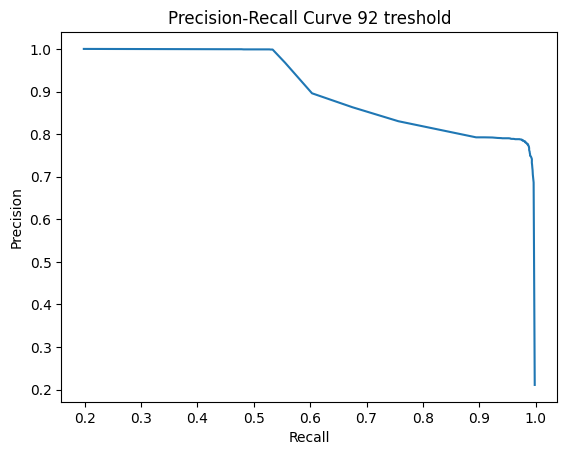

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_precision_recall_curve(positive_scores, negative_scores):
    """
    Calculate the precision-recall curve.

    Parameters:
    positive_scores (array-like): Scores of positive samples.
    negative_scores (array-like): Scores of negative samples.

    Returns:
    ndarray: Array of precision values.
    ndarray: Array of recall values.
    """
    thresholds = np.linspace(min(min(positive_scores), min(negative_scores)),
                             max(max(positive_scores), max(negative_scores)), 100)
    precisions = []
    recalls = []

    for threshold in thresholds:
        tp = np.sum(positive_scores >= threshold)
        fp = np.sum(negative_scores >= threshold)

        recall  = tp / (tp + fp)
        precision = tp / len(positive_scores)

        precisions.append(precision)
        recalls.append(recall)

    return np.array(precisions), np.array(recalls)


precisions, recalls = calculate_precision_recall_curve(data['#SCORE'].values, data2['#SCORE'].values)

# Plot the precision-recall curve
plt.plot(recalls, precisions)
#plt.plot(recalls)
#plt.plot(precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve 92 treshold")
plt.show()

In [43]:
auc = np.trapz(precisions, recalls)

print("Area under the curve (AUC):", auc)

Area under the curve (AUC): 0.725785582430248


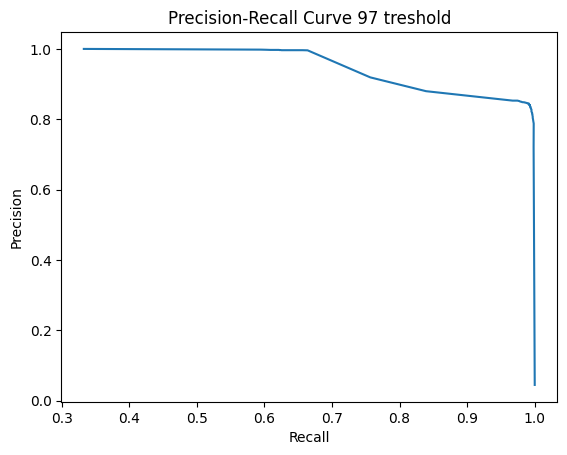

In [44]:
precisions, recalls = calculate_precision_recall_curve(data3['#SCORE'].values, data4['#SCORE'].values)

# Plot the precision-recall curve
plt.plot(recalls, precisions)
#plt.plot(recalls)
#plt.plot(precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve 97 treshold")
plt.show()

In [45]:
auc = np.trapz(precisions, recalls)

print("Area under the curve (AUC):", auc)

Area under the curve (AUC): 0.6315088497359592


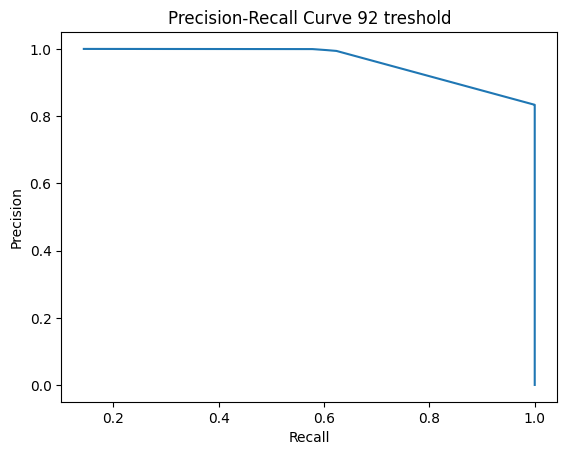

In [46]:
precisions, recalls = calculate_precision_recall_curve(data5.values, data6.values)

# Plot the precision-recall curve
plt.plot(recalls, precisions)
#plt.plot(recalls)
#plt.plot(precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve 92 treshold")
plt.show()

In [47]:
auc = np.trapz(precisions, recalls)

print("Area under the curve (AUC):", auc)

Area under the curve (AUC): 0.8235899144741592
